In [51]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import minkowski_tools as mt

In [63]:
import importlib
importlib.reload(mt)

<module 'minkowski_tools' from '/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/minkowski_tools.py'>

**Generate random points and plot them quickly.** These are distributed using uniform [Poission Point Process](https://en.wikipedia.org/wiki/Poisson_point_process) and constrained between 0 and 1. 

In [53]:
n=2000
rand_points = np.random.uniform(size=(2, n-2))
edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
points = np.concatenate((rand_points, edge_points), axis=1)

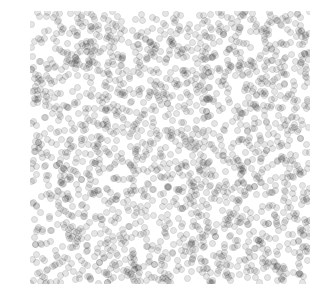

In [54]:
fig, ax = plt.subplots(figsize=(5, 5))
mt.plot_points_simple(ax, points)

Finding the **shortest path** accross the space using the Minkowski distance (here use `p=2`), and connecting points within radius 0.05 in the upper left direction. Plot.

In [64]:
connections = mt.get_connections(points, pval=2, radius=.05)
short_path = mt.shortest_path(connections)
_ = [print('-> {}'.format(ind), end=' ') for ind in short_path]

-> 1999 -> 5 -> 1324 -> 613 -> 225 -> 332 -> 1888 -> 1453 -> 602 -> 890 -> 1054 -> 733 -> 1624 -> 306 -> 1192 -> 899 -> 1408 -> 339 -> 616 -> 327 -> 85 -> 244 -> 444 -> 1269 -> 1980 -> 1345 -> 288 -> 1430 -> 1852 -> 1013 -> 1047 -> 709 -> 1182 -> 1722 -> 422 -> 1555 -> 907 -> 703 -> 1998 

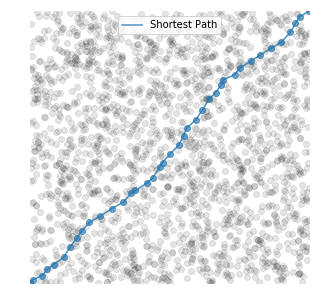

In [65]:
fig, ax = plt.subplots(figsize=(5, 5))
mt.plot_points_simple(ax, points, [short_path], ['Shortest Path'])

**Varying the Minkowski distance p value** and visualising the results.

Generating points - 1 - 2 - 3 - 4 
Getting connections: p=0.6, r=0.0715 

/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/minkowski_tools.py:50: RuntimeWarning: invalid value encountered in power
  distsp = (x_diffs**pval + y_diffs**pval)*(x_diffs>0)*(y_diffs>0)
/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/minkowski_tools.py:51: RuntimeWarning: invalid value encountered in less
  connections = (((distsp<radp)*distsp)**(1/pval))*(x_diffs>0)*(y_diffs>0)


: p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting shortest paths: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting connections: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting shortest paths: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting connections: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting shortest paths: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting connections: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting shortest paths: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 


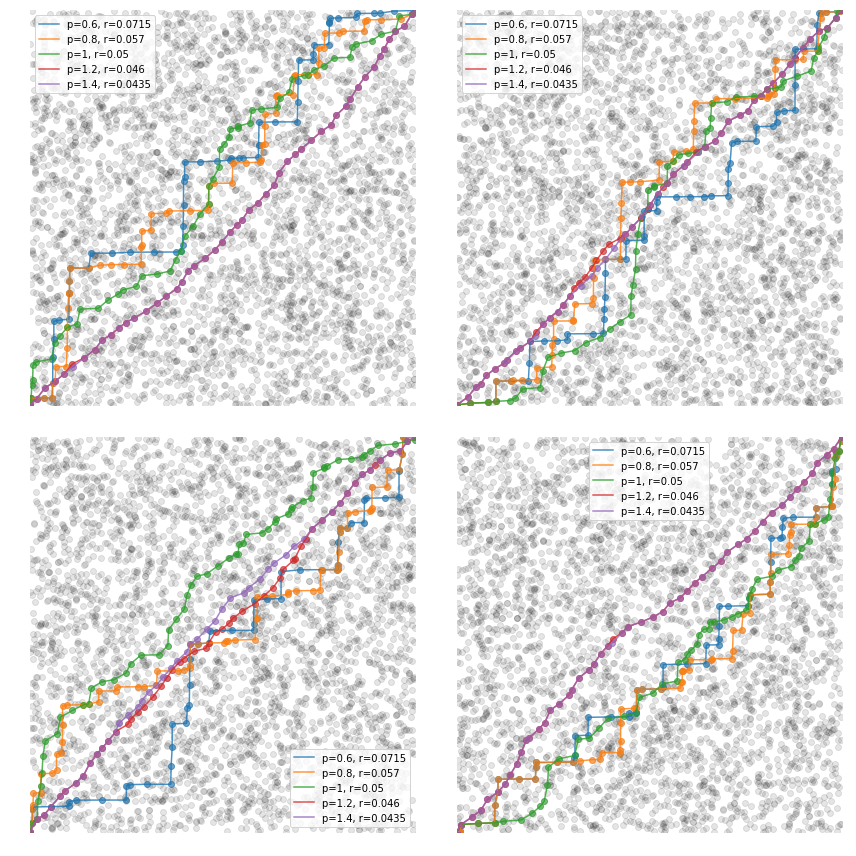

In [90]:
n=4000

fig, axes = plt.subplots(2, 2, figsize=(12,12))
ps, rs = [0.8, 1, 1.2], [0.2, 0.1, 0.1]

ps = [0.6, 0.8, 1, 1.2, 1.4]
r_rel = np.array([1.43, 1.14, 1, 0.92, 0.87])
rs = r_rel/20

print('Generating points', end=' ')
ensemble_points = [np.concatenate((np.random.uniform(size=(2, n-2)), np.array([[0.0, 1.0],[0.0, 1.0]])), axis=1) for count in range(4) if not print('- {} '.format(count+1), end='')]
print()

for points, ax in zip(ensemble_points, axes.flatten()):

    path_labels = ['p={}, r={:.3}'.format(p, r) for p, r in zip(ps, rs)]
    
    print('Getting connections', end='')
    diff_connections = [mt.get_connections(points, pval=p, radius=r) for p, r,label in zip(ps, rs, path_labels) if not print(': '+ label, end=' ')]
    print()
    print('Getting shortest paths', end='')
    short_paths = [mt.shortest_path(connections) for connections, label in zip(diff_connections, path_labels) if not print(': '+ label, end=' ')]
    print()    
    
    mt.plot_points_simple(ax, points, short_paths, path_labels)

plt.tight_layout()